# Proyecto Final

#### Descompocion de la tarea.
El objetivo de este proyecto es: 
- Llevar a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
  - Esto con la finalidad de poder optimizar las decisiones empresariales y poder aumentar la rentabilidad y valor de la misma.
- Prueba las hipótesis estadísticas
  - a reserva que el area interesada tenga necesidades de informacion particulares se sugieren las siguientes hipotesis y analisis
    - Hay una mayor cantidad de llamadas internas que externas.
    - La mayoria de las llamadas se conectaron (es decir no son llamadas perdidas)
    - Las llamadas internas tienen una duracion mayor con respecto a las externas


Esto utilizando dos datasets sobre el uso del servicio de telefonía virtual CallMeMaybe.

Estos data sets son:

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

### Links de extras

- Se Generaron los Dashboars sugeridos en tableau:  https://public.tableau.com/views/ProyectoFinal_17433787005810/Dashboard1
- Link del PDF: https://github.com/hukitan/tripleten/blob/d059240a0bc1f0f4fa8a2b74007ea85361474750/Proyectos_en_desarrollo/Proyecto%20Final/proyecto%20final.pdf
  (no se si haya problema porque el pdf este en github)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

In [56]:
telco_ds = pd.read_csv('Datasets/telecom_dataset_us.csv')
telco_ds['date'] = pd.to_datetime(telco_ds['date'])
looks(telco_ds)

Se ejecuta la descripción de los datos:
              user_id                                 date direction internal  \
count    53902.000000                                53902     53902    53785   
unique            NaN                                  NaN         2        2   
top               NaN                                  NaN       out    False   
freq              NaN                                  NaN     31917    47621   
mean    167295.344477  2019-10-23 01:00:32.191755520+03:00       NaN      NaN   
min     166377.000000            2019-08-02 00:00:00+03:00       NaN      NaN   
25%     166782.000000            2019-10-04 00:00:00+03:00       NaN      NaN   
50%     167162.000000            2019-10-28 00:00:00+03:00       NaN      NaN   
75%     167819.000000            2019-11-14 00:00:00+03:00       NaN      NaN   
max     168606.000000            2019-11-28 00:00:00+03:00       NaN      NaN   
std        598.883775                                  NaN       NaN 

In [57]:
telco_ds[telco_ds.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


In [58]:
client_ds = pd.read_csv('Datasets/telecom_clients_us.csv')

client_ds['date_start'] = pd.to_datetime(client_ds['date_start'])

looks(client_ds)

Se ejecuta la descripción de los datos:
              user_id tariff_plan                     date_start
count      732.000000         732                            732
unique            NaN           3                            NaN
top               NaN           C                            NaN
freq              NaN         395                            NaN
mean    167431.927596         NaN  2019-09-14 16:39:20.655737600
min     166373.000000         NaN            2019-08-01 00:00:00
25%     166900.750000         NaN            2019-08-23 00:00:00
50%     167432.000000         NaN            2019-09-16 00:00:00
75%     167973.000000         NaN            2019-10-08 00:00:00
max     168606.000000         NaN            2019-10-31 00:00:00
std        633.810383         NaN                            NaN

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtyp

In [59]:
# Rellenar valores nulos
# Asumimos que si no está marcado, no es interna
telco_ds["internal"] = telco_ds["internal"].fillna(False)
# Usamos -1 para representar operador desconocido
telco_ds["operator_id"] = telco_ds["operator_id"].fillna(-1)
# Convertir internal a booleano
telco_ds["internal"] = telco_ds["internal"].astype(bool)
#segundos a minutos 
telco_ds['call_duration_m'] = telco_ds['call_duration'] / 60
# renombramos de bolenao a texto
telco_ds['internal'] = telco_ds['internal'].replace(
    {True: 'Interno', False: 'Externo'})

/tmp/ipykernel_74297/3116805750.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_ds["internal"] = telco_ds["internal"].fillna(False)


#### No se encuentran particularidades relevantes en los datos, a pesar de de encontrar duplicados aparentemente hacen referencia a distintas llamadas. Por lo que se desestima como dato de relevancia.

#### Se hacen las converciones y relleno de NA encontrados en telco_ds

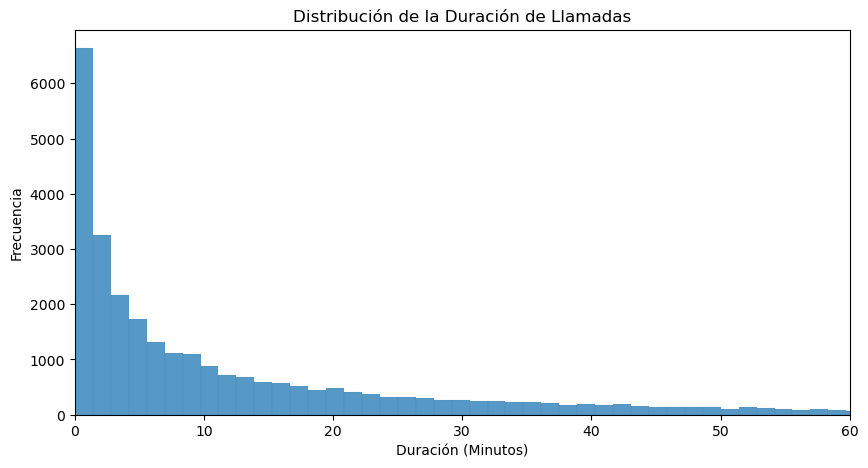

In [60]:
plt.figure(figsize=(10, 5))
sns.histplot(telco_ds[telco_ds["call_duration_m"] > 0]["call_duration_m"])
# Para evitar sesgo visual
plt.xlim(0, 60)
plt.title("Distribución de la Duración de Llamadas")
plt.xlabel("Duración (Minutos)")
plt.ylabel("Frecuencia")
plt.show()

#### Se observa que la mayoria de las llamadas tienen una duracion de aproximadamente menor a 10 minutos.

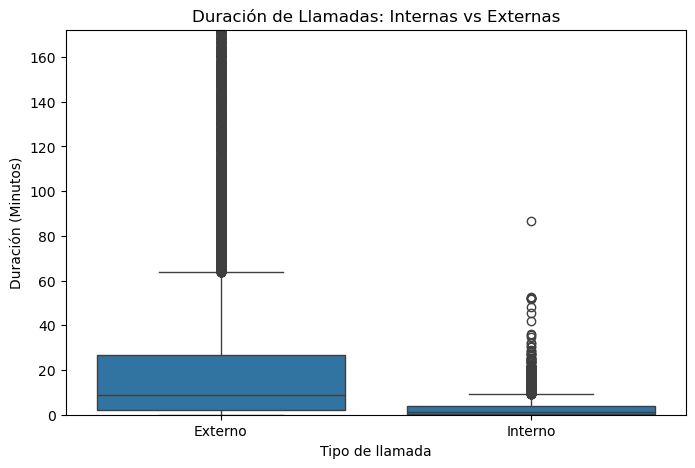

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=telco_ds["internal"],
            y=telco_ds[telco_ds["call_duration_m"] > 0]["call_duration_m"])
plt.ylim(0, telco_ds["call_duration_m"].quantile(0.99))
plt.title("Duración de Llamadas: Internas vs Externas")
plt.xlabel("Tipo de llamada")
plt.ylabel("Duración (Minutos)")
plt.show()

In [62]:
from scipy.stats import ttest_ind

internas = telco_ds[telco_ds["internal"]
                    == 'Interno']["call_duration"]
externas = telco_ds[telco_ds["internal"]
                    == 'Externo']["call_duration"]

# Prueba t de Student
t_stat, p_value = ttest_ind(internas, externas, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa.")
else:
    print("No hay una diferencia significativa.")

T-statistic: -46.96548101210464, P-value: 0.0
Existe una diferencia estadísticamente significativa.


#### Con base en la grafica y corroborado en la prueba estadisitca confirmamos la hiptesis que las llamadas externas duran mas que las internas

In [63]:
# Agrupar por operador y calcular el porcentaje de llamadas perdidas
operador_ineficaz = telco_ds.groupby("operator_id").agg(
    total_llamadas=("calls_count", "sum"),
    llamadas_perdidas=("is_missed_call", "sum")
)

# Calcular el porcentaje de llamadas perdidas
operador_ineficaz["porcentaje_perdidas"] = (
    operador_ineficaz["llamadas_perdidas"] / operador_ineficaz["total_llamadas"]) * 100

# Ordenar de mayor a menor porcentaje de llamadas perdidas
operador_ineficaz = operador_ineficaz.sort_values(
    by="porcentaje_perdidas", ascending=False)

# Mostrar los operadores con mayor ineficiencia
operador_ineficaz.head(10)

,total_llamadas,llamadas_perdidas,porcentaje_perdidas
operator_id,,,
941826.0,1,1,100.0
937872.0,1,1,100.0
885682.0,3,3,100.0
914272.0,1,1,100.0
970258.0,1,1,100.0
924572.0,1,1,100.0
914626.0,1,1,100.0
937778.0,1,1,100.0
958458.0,1,1,100.0


In [64]:
# Ordenar operadores por cantidad de llamadas atendidas
operadores_menos_activos = operador_ineficaz.sort_values(
    by="total_llamadas", ascending=True)
# Mostrar los 10 operadores con menos llamadas
operadores_menos_activos.head(10)

,total_llamadas,llamadas_perdidas,porcentaje_perdidas
operator_id,,,
941826.0,1,1,100.0
911104.0,1,0,0.0
946468.0,1,0,0.0
946032.0,1,0,0.0
899906.0,1,0,0.0
945710.0,1,0,0.0
945274.0,1,0,0.0
950632.0,1,0,0.0
947596.0,1,0,0.0


#### Con base a las tablas anteriores encontramos a los operadores mas ineficientes y con menor actividad. Esto para permitir tomar implementar estrategias de solucion y poder incrementar la eficiencia y actividad de los operadores identificados

In [65]:
# Total de llamadas y llamadas perdidas
total_llamadas = telco_ds["calls_count"].sum()
llamadas_perdidas = telco_ds["is_missed_call"].sum()

# Calcular porcentaje de llamadas conectadas
porcentaje_conectadas = (
    (total_llamadas - llamadas_perdidas) / total_llamadas) * 100
print(f"📞 Porcentaje de llamadas conectadas: {porcentaje_conectadas:.2f}%")

📞 Porcentaje de llamadas conectadas: 97.34%


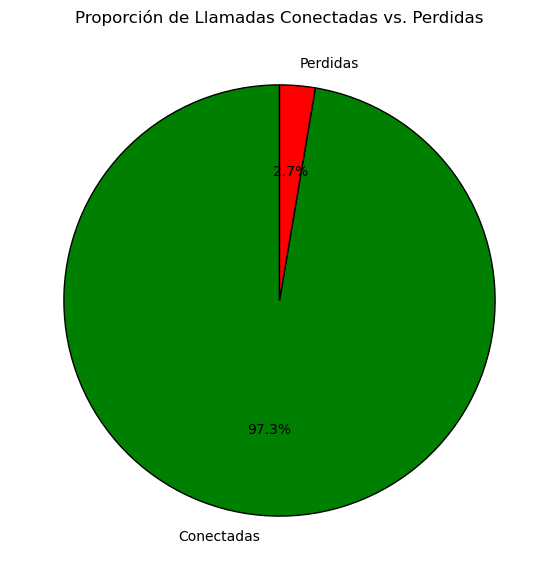

In [66]:
llamadas_conectadas = total_llamadas - llamadas_perdidas

# Datos para la gráfica
labels = ["Conectadas", "Perdidas"]
sizes = [llamadas_conectadas, llamadas_perdidas]
colors = ["green", "red"]

# Gráfica de pastel
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors,
        startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Proporción de Llamadas Conectadas vs. Perdidas")
plt.show()

#### Se observa que el 97.3% de las llamadas son enlazadas lo cual muestra una eficiencia general en ese sentido.

In [67]:
from scipy.stats import ttest_ind

# Filtrar llamadas internas y externas
internas = telco_ds[telco_ds["internal"]
                    == 'Interno']["call_duration"]
externas = telco_ds[telco_ds["internal"]
                    == 'Externo']["call_duration"]

# Prueba t de Student
t_stat, p_value = ttest_ind(internas, externas, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa: las llamadas internas y externas tienen duraciones diferentes.")
    if internas.mean() > externas.mean():
        print("📌 Las llamadas internas tienen una duración mayor en promedio.")
    else:
        print("📌 Las llamadas externas tienen una duración mayor en promedio.")
else:
    print("No hay una diferencia significativa en la duración de llamadas internas y externas.")

T-statistic: -46.96548101210464, P-value: 0.0
Existe una diferencia estadísticamente significativa: las llamadas internas y externas tienen duraciones diferentes.
📌 Las llamadas externas tienen una duración mayor en promedio.


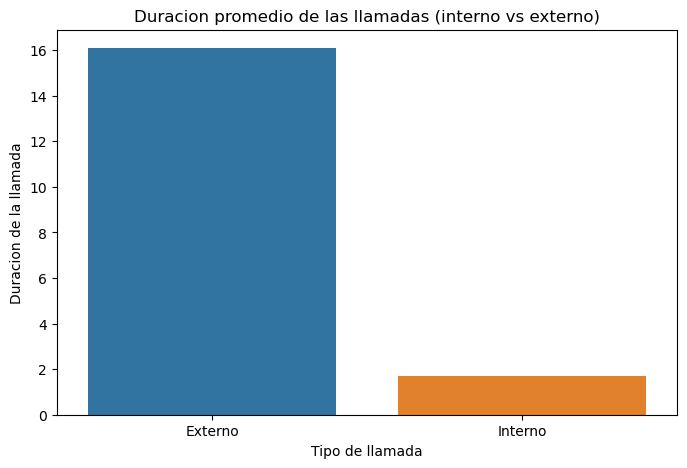

In [68]:
duracion_llamadas = telco_ds.groupby('internal')['call_duration_m'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=duracion_llamadas, x='internal',
            y='call_duration_m', hue='internal', errorbar='sd')
plt.title('Duracion promedio de las llamadas (interno vs externo)')
plt.xlabel('Tipo de llamada')
plt.ylabel('Duracion de la llamada')
plt.show()

#### Observamos que  la duracion promedio de las llamadas externas es mayor que las internas. (Confirmado con prueba estadistica)

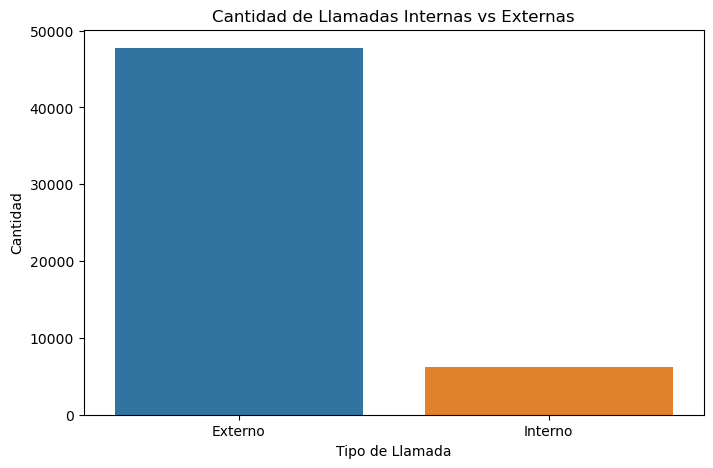

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(data=telco_ds, x='internal', hue='internal')
plt.title("Cantidad de Llamadas Internas vs Externas")
plt.xlabel("Tipo de Llamada")
plt.ylabel("Cantidad")
plt.show()

#### Confirmamos de manera visual que las llamadas externas son mucho mas frecuentes que las internas. 